## Plot heatmap

Print heatmaps from csv files produced by analyse_region_by_population.py / vcf_1KG.create_heatmap_table

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages


def print_heatmap_pdf(pdfname, heat_table, colors, vmin, vmax, label, savepdf=True, properties=dict()):
    """
    Print heatmap as pdf.

    """
    with PdfPages(pdfname) as pdf:
        fig = plt.figure(figsize=(20, 7))
        sns.set_style("whitegrid")
        cmap = matplotlib.colors.ListedColormap(colors)  # Create a new colormap with colors
        ax = sns.heatmap(heat_table, cmap=cmap, cbar_kws={'label': label}, vmin=vmin, vmax=vmax)
        ax.set_xlabel('Segment (GRCh37 coordinates)')
        ax.set_ylabel('Population')
        d = pdf.infodict()
        for key in properties:
            d[key] = properties[key]
        if savepdf:
            pdf.savefig(fig, orientation='landscape')
    return fig

Print heatmaps for $\rho$

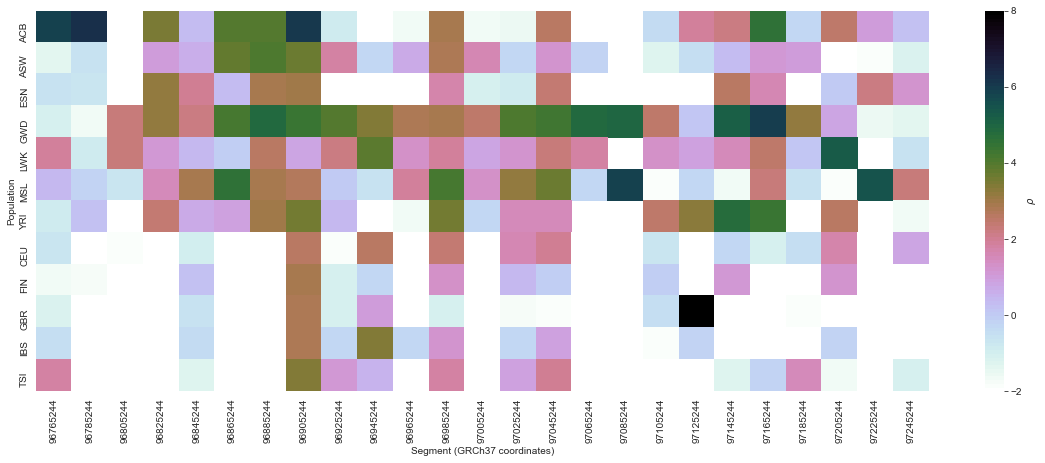

In [7]:
monochrome = False              # Determine if plot is monochrome or colour.

c = np.linspace(0,1,101)
if monochrome:
    colors = plt.get_cmap("Blues_r",101)(c)
    c0, c1 = colors[0].copy(), colors[100].copy()
    colors[30: 101] = c0
    colors[0: 30] = c1
else:
    colors = plt.get_cmap("cubehelix", 101)(c)
    colors = np.flip(colors, axis=0)

fname = '/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/data/chr2_heat_table_rlnt004.csv'
properties = {'Title': 'Selection heatmap for chromosome 2q11.1',\
              'Subject': 'Data file:' + fname,
              'Author': 'Helmut Simon',
              'Keywords': '$\\rho $',
              'CreationDate': datetime.datetime.today()}
heat_table = pd.read_csv(fname, sep=',', index_col=0)
pdfname = '/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/heatmap_chr2q_rho_nodemog_col_004.pdf'
fig = print_heatmap_pdf(pdfname, heat_table, colors, -2, 8, '$\\rho $',\
                                savepdf=True, properties=properties)
plt.show()

Plot heatmaps for Tajima's D

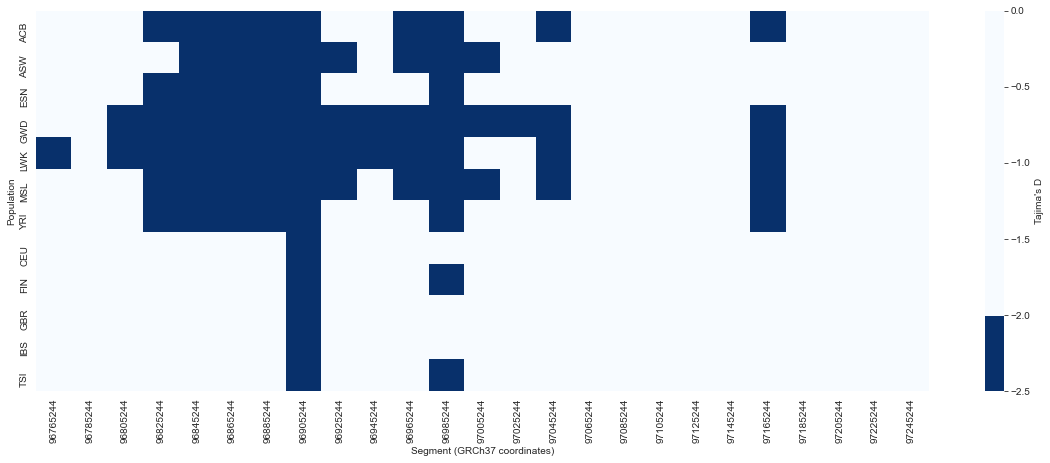

In [10]:
monochrome = True              # Determine if plot is monochrome or colour.

c = np.linspace(0,1,101)
if monochrome:
    colors = plt.get_cmap("Blues_r",101)(c)
    c0, c1 = colors[0].copy(), colors[100].copy()
    colors[20: 101] = c1
    colors[0: 20] = c0
else:
    colors = plt.get_cmap("cubehelix", 101)(c)
    
fname = '/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/data/chr2_heat_table_tajd003.csv'
properties = {'Title': 'Selection heatmap for chromosome 2q11.1',\
              'Subject': 'Data file:' + fname,
              'Author': 'Helmut Simon',
              'Keywords': 'Tajima\'s D',
              'CreationDate': datetime.datetime.today()}
heat_table = pd.read_csv(fname, sep=',', index_col=0)
pdfname = '/Users/helmutsimon/Google Drive/Genetics/Bayes SFS/Neutrality test/heatmap_chr2q_TajD_mono.pdf'
fig = print_heatmap_pdf(pdfname, heat_table, colors, -2.5, 0, 'Tajima\'s D',\
                                savepdf=True, properties=properties)
plt.show()